In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


import math
from IPython.display import Markdown, display


In [4]:

data = pd.read_csv('wtvsht.csv')
data.head()

,Weight,Height
0,63,174
1,55,168
2,58,176
3,63,185
4,53,167


In [5]:
data.shape

(100, 2)

In [6]:
data.isnull().sum()

,0
Weight,0
Height,0


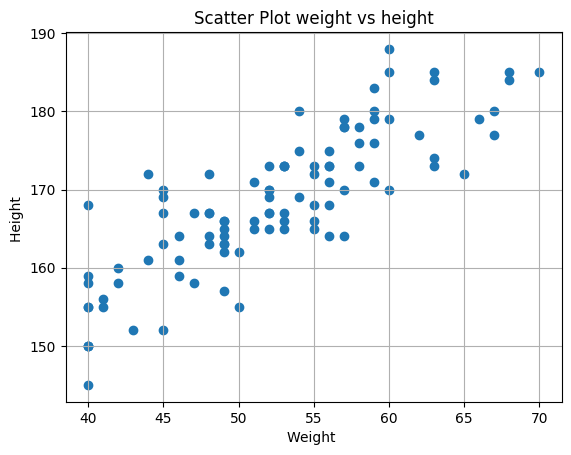

In [12]:
plt.scatter(data["Weight"], data["Height"])
plt.xlabel("Weight ")
plt.ylabel("Height ")
plt.title("Scatter Plot weight vs height")
plt.grid(True)
plt.show()

In [8]:

X = data[['Weight',]]
y = data['Height']


# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Train linearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Model Interpretation
# Print model coefficients kalau lebih dari 1
print('Model Coefficients:')
for feature, coef in zip(X.columns, model.coef_):
    print(f'{feature}: {coef:.4f}')
# Print model coecoefficient dan intercept
print(f'Intercept: {model.intercept_:.4f}')
print(f'coef:',model.coef_)
# print('catatan pengertian coefisen : coefisen=setiap x naik 1 maka y akan naik/turun berdasarkan coefisen')
display(Markdown("""
# Rumus Linear Regression

## Formula
Y = a + bX

## Keterangan
- **Y** : nilai prediksi (target)
- **a** : intercept (konstanta)
- **b** : koefisien regresi
- **X** : variabel input (fitur/variabel bebas)

## Contoh (berdasarkan model)
Misalkan model menghasilkan:

- Intercept (**a**) = 114.0558
- Koefisien Weight (**b**) = 1.0389

Maka persamaan regresinya adalah:

### Height = 114.0558 + 1.0389 × Weight

## Contoh prediksi
Jika Weight = 63:

Height = 114.0558 + (1.0389 × 63)
Height ≈ **179.51**
"""))

Model Coefficients:
Weight: 1.0389
Intercept: 114.0558
coef: [1.03889287]



# Rumus Linear Regression

## Formula
Y = a + bX

## Keterangan
- **Y** : nilai prediksi (target)
- **a** : intercept (konstanta)
- **b** : koefisien regresi
- **X** : variabel input (fitur/variabel bebas)

## Contoh (berdasarkan model)
Misalkan model menghasilkan:

- Intercept (**a**) = 114.0558
- Koefisien Weight (**b**) = 1.0389

Maka persamaan regresinya adalah:

### Height = 114.0558 + 1.0389 × Weight

## Contoh prediksi
Jika Weight = 63:

Height = 114.0558 + (1.0389 × 63)
Height ≈ **179.51**


In [10]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
df_compare = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})

print("MSE",mse)
print("r2",r2,"\n")

print(df_compare.head(5),"\n")

display(Markdown("""
# Rumus MSE (Mean Squared Error)

## Formula
MSE = (1/n) × Σ (Y_aktual − Y_prediksi)²

## Keterangan
- **Y_aktual** : nilai sebenarnya
- **Y_prediksi** : nilai hasil prediksi model
- **n** : jumlah data

## Contoh perhitungan MSE (5 data tinggi vs berat)
MSE = ((164−173)² + (176−175)² + (173−171)² + (162−166)² + (155−155)²) / 5
Maka MSE = **20.4**
"""))


MSE 31.402258484039443
r2 0.4926117549840129 

   Actual   Predicted
0     164  173.272727
1     176  175.350513
2     173  171.194942
3     162  166.000477
4     155  155.611549 




# Rumus MSE (Mean Squared Error)

## Formula
MSE = (1/n) × Σ (Y_aktual − Y_prediksi)²

## Keterangan
- **Y_aktual** : nilai sebenarnya
- **Y_prediksi** : nilai hasil prediksi model
- **n** : jumlah data

## Contoh perhitungan MSE (5 data tinggi vs berat)
MSE = ((164−173)² + (176−175)² + (173−171)² + (162−166)² + (155−155)²) / 5
Maka MSE = **20.4**


In [25]:
# plt.scatter(X, y, color='gray', label="Data Aktual")
# plt.scatter(X_test, y_pred, color='red', label="Hasil Prediksi")


# plt.plot(X_test, y_pred,color='blue', label="Garis Regresi", linewidth=2)

# plt.xlabel("Weight")
# plt.ylabel("Height")
# plt.title("Regresi Linear Sederhana")
# plt.legend()
# plt.grid(True)
# plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


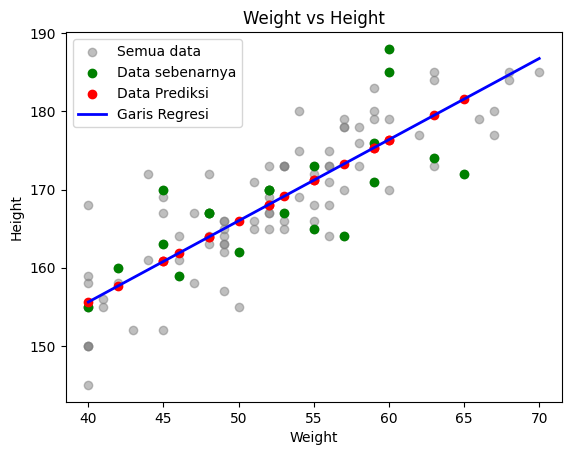

In [29]:
X_sorted = np.sort(X.values, axis=0)
y_sorted_pred = model.predict(X_sorted)

plt.scatter(X, y, color='gray', alpha=0.5, label='Semua data')
plt.scatter(X_test, y_test, color='green', label='Data sebenarnya')
plt.scatter(X_test, y_pred, color='red', label='Data Prediksi')
plt.plot(X_sorted, y_sorted_pred, color='blue', linewidth=2, label='Garis Regresi')
plt.xlabel("Weight")
plt.ylabel("Height")
plt.legend()
plt.title("Weight vs Height")
plt.show()


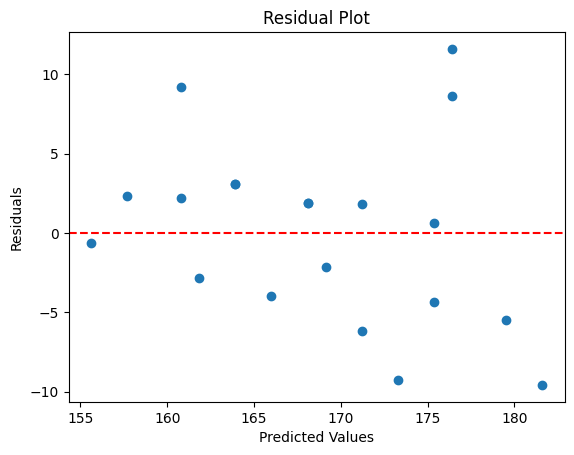

In [19]:
residuals = y_test - y_pred

plt.figure()
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')

plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


In [21]:
# plt.figure()
# plt.scatter(y_test, y_pred)
# plt.plot(
#     [y_test.min(), y_test.max()],
#     [y_test.min(), y_test.max()],
#     'r--'
# )

# plt.xlabel("Actual")
# plt.ylabel("Predicted")
# plt.title("Actual vs Predicted")
# plt.show()
